In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import helpers.processing_helpers as ph

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

In [2]:
df_dev = pd.read_csv("./dataset/development.csv")

In [84]:
noise_indexes = [0,7,12,15,16,17]
acc_idxs = [1,2,3,4,5,6,8,9,10,11,13,14]
features = ["pmax", "negpmax", 'area', 'tmax', 'rms']

sensors_removed = df_dev.drop(columns=ph.get_column_names(features, noise_indexes))
sensors_removed

,x,y,pmax[1],negpmax[1],area[1],tmax[1],rms[1],pmax[2],negpmax[2],area[2],...,pmax[13],negpmax[13],area[13],tmax[13],rms[13],pmax[14],negpmax[14],area[14],tmax[14],rms[14]
0,200.0,200.0,5.409161,-17.721210,4.538778,22.600000,1.563902,6.084506,-19.892543,3.132328,...,7.454877,-16.861163,4.191909,72.600000,1.184943,6.611877,-17.685799,4.884680,162.800000,1.284969
1,200.0,200.0,4.414289,-4.736827,3.720435,111.875058,1.228058,4.507257,-3.787175,3.267461,...,18.472514,-3.372324,16.620582,119.812512,1.578009,13.802252,-5.154840,8.758870,120.000000,1.093953
2,200.0,200.0,4.567191,-5.985437,3.490490,107.800000,1.015408,5.384155,-3.948853,2.929150,...,7.336668,-5.742383,11.792258,71.908212,1.333036,5.940039,-3.860550,5.340140,6.614830,1.183951
3,200.0,200.0,5.019058,-4.229949,6.786200,175.600000,1.350620,4.165598,-5.576041,1.544370,...,8.450671,-6.342114,4.496741,72.600000,1.945065,6.434910,-5.576315,15.789638,72.195420,1.738998
4,200.0,200.0,3.250262,-5.783587,2.449456,159.800000,0.759515,4.736023,-5.137939,4.211047,...,8.721952,-4.396436,9.127136,71.411535,1.513988,4.483080,-5.361823,3.366542,160.185705,1.323621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385495,600.0,595.0,49.819376,-26.266623,24.781403,71.000000,1.021450,55.651440,-29.947864,28.621582,...,19.454065,-7.531409,10.650762,71.400000,0.964490,5.842563,-4.147369,4.551567,71.200000,1.681396
385496,600.0,595.0,51.016495,-26.138474,27.090894,71.400000,1.570939,58.084024,-34.662131,28.435582,...,17.604636,-5.505725,12.827195,71.500314,1.632497,11.819031,-5.125480,4.505713,72.400000,1.227755
385497,600.0,595.0,46.661682,-30.943115,24.980347,71.200000,1.255832,61.840103,-35.670273,30.500351,...,20.783524,-6.318405,13.981320,71.600000,1.944626,10.120659,-3.479907,11.049597,71.373814,1.273724
385498,600.0,595.0,46.515765,-22.520367,33.163073,71.400000,1.465443,49.772070,-33.298181,27.110076,...,14.048267,-6.915601,11.846003,71.600000,1.286150,10.754880,-5.030399,7.560762,71.200000,1.053635


# Starting with negpmax outliers

In [4]:
# Checking how many of the sensors have values above 0
negpmax_clms = sensors_removed[[f'negpmax[{i}]' for i in acc_idxs]]
df_above_zero = negpmax_clms[(negpmax_clms > 0).any(axis=1)]

# We can see that three of the events include a negpmax value above 0 and they are above 70000, and clearly faulty readings.
df_above_zero

,negpmax[1],negpmax[2],negpmax[3],negpmax[4],negpmax[5],negpmax[6],negpmax[8],negpmax[9],negpmax[10],negpmax[11],negpmax[13],negpmax[14]
93055,-5.230824,74820.439676,-6.426794,-7.850610,-72.066412,-19.270636,-12.398489,-4.941119,-7.263858,-4.484512,-7.634818,-6.796109
188194,-5.892503,74827.377234,-5.836270,-5.698038,-19.653781,-5.550021,-4.592166,-4.340689,-40.689526,-10.598145,-39.415897,-4.135703
232393,-18.781116,-19.235596,-17.818414,-19.567654,-17.616177,-19.700745,-16.931372,-22.695142,-32.393964,-36.985382,-28.748840,74812.277374


In [5]:
print(sensors_removed.shape[0])
sensors_removed = sensors_removed.drop(df_above_zero.index.values)
print(sensors_removed.shape[0])

385500
385497


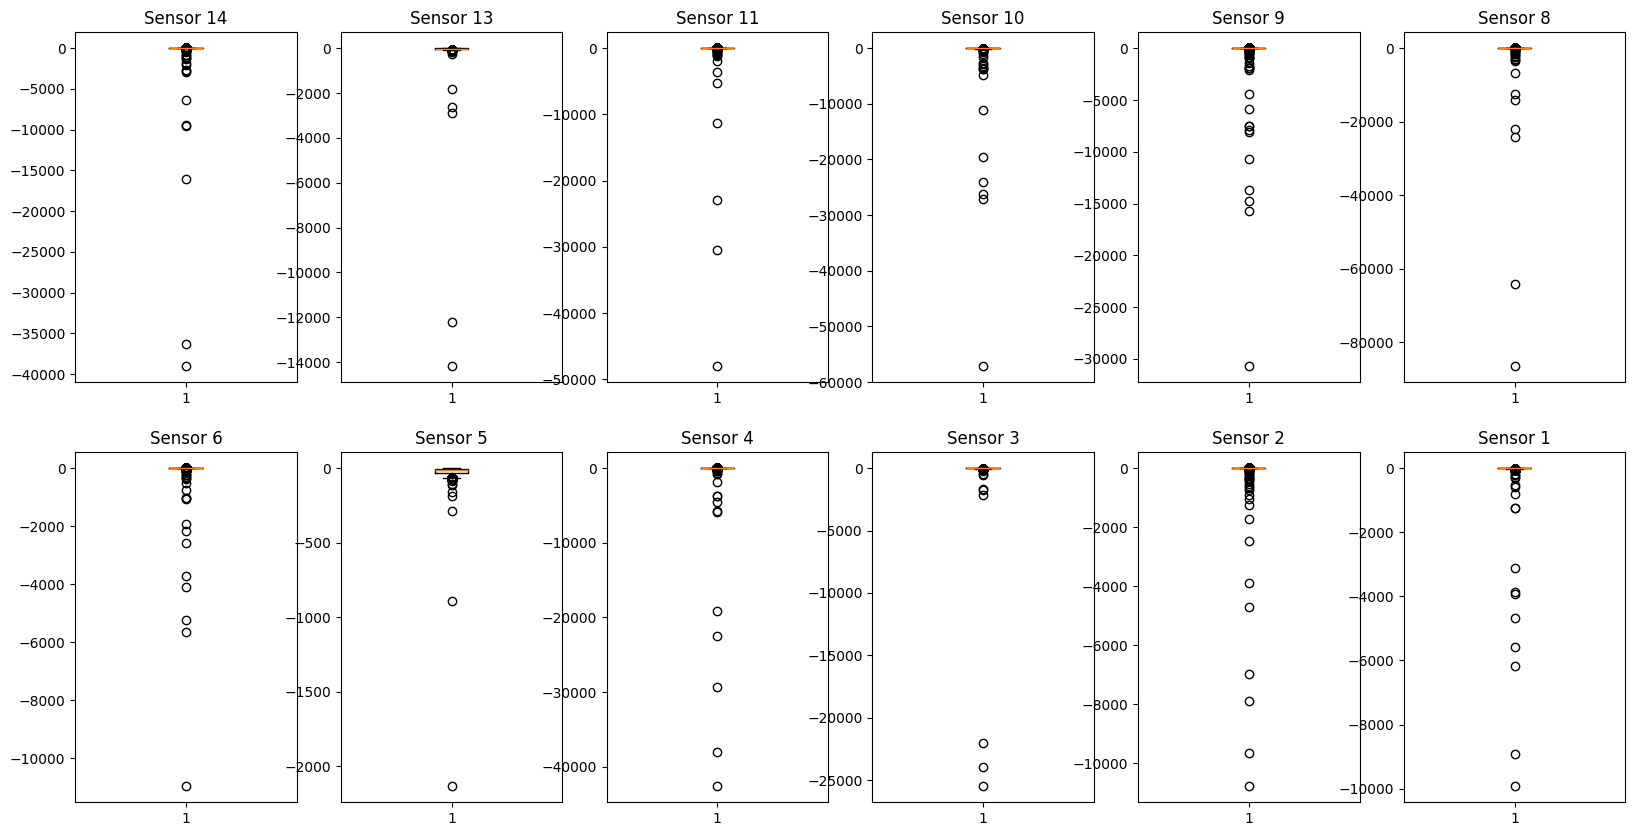

In [6]:
fig, ax = plt.subplots(2, 6, figsize=(20, 10))
idxs = acc_idxs.copy()
for i in range(2):
    for j in range(6):
        idx = idxs.pop()
        ax[i, j].boxplot(sensors_removed[f'negpmax[{idx}]'])
        ax[i, j].set_title("Sensor " + str(idx))

{'whiskers': [<matplotlib.lines.Line2D at 0x1cebf878050>,
 'caps': [<matplotlib.lines.Line2D at 0x1cebf879590>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cebf855e10>],
 'medians': [<matplotlib.lines.Line2D at 0x1cebf87aa10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cebf87b550>],
 'means': []}

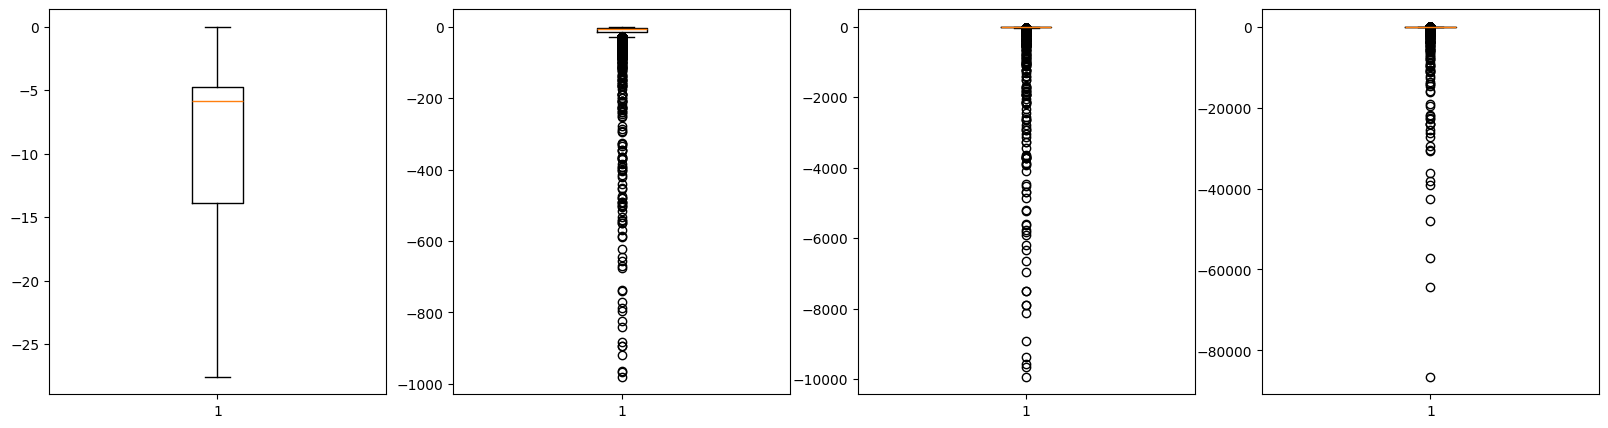

In [7]:
# Joining all the negpmax values of all the sensors
joined_negpmax = pd.concat([sensors_removed[clmn] for clmn in negpmax_clms])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))

ax1.boxplot(joined_negpmax, showfliers=False)
ax2.boxplot(joined_negpmax[joined_negpmax > -1000])
ax3.boxplot(joined_negpmax[joined_negpmax > -10000])
ax4.boxplot(joined_negpmax)

In [86]:
df_below = negpmax_clms[(negpmax_clms < -10000).any(axis=1)]
df_below

,negpmax[1],negpmax[2],negpmax[3],negpmax[4],negpmax[5],negpmax[6],negpmax[8],negpmax[9],negpmax[10],negpmax[11],negpmax[13],negpmax[14]
2452,-3.822879,-3.694577,-4.115926,-4.451904,-17.135080,-9.268875,-65.447583,-11.248019,-23.575189,-22899.460046,-6.778067,-5.184732
9865,-4.934546,-4.570819,-22010.555079,-7.131421,-28.686304,-34.294363,-32.878824,-5.011841,-6.902465,-5.278000,-5.814865,-5.757333
10868,-2.536227,-5.826446,-5.389603,-19.803885,-22.431143,-67.674594,-12.008563,-2.846982,-5.920920,-5.635446,-12193.059131,-8.029373
26836,-5.339877,-4.998752,-4.094788,-20.266284,-26.532123,-64.836127,-8.158307,-4.499167,-4.693802,-5.132028,-6.884583,-39039.394697
29620,-4.085245,-4.155222,-5.957225,-5.178799,-11.825500,-4.712555,-48.250687,-12.785474,-31.217343,-48053.652150,-3.681378,-7.397391
35902,-6.053192,-3.253781,-2.800882,-19198.846054,-23.151944,-9.559399,-56.144922,-9.487695,-27.233041,-5.883591,-5.632022,-6.157581
40306,-3.226143,-3.855231,-3.860974,-6.374130,-4.967517,-4.640866,-23.139966,-24.778384,-49.644370,-6.314960,-14186.920829,-5.459780
44319,-3.872687,-4.407233,-4.613116,-42648.221376,-27.847595,-40.080081,-9.886993,-4.787943,-5.082312,-4.388821,-4.963489,-5.594153
70611,-3.953534,-3.669089,-5.173007,-8.352310,-52.952359,-15.552252,-23.888898,-13676.730525,-10.632147,-4.431033,-7.858456,-5.130597
123657,-4.562955,-6.139838,-23980.586464,-4.180176,-4.247638,-3.265009,-6.181985,-9.489072,-63.399927,-19.157776,-8.979578,-3.816855


<Axes: ylabel='Frequency'>

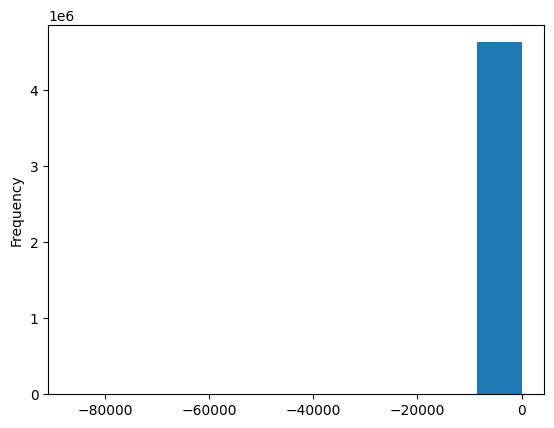

In [21]:
joined_negpmax.plot(kind='hist', bins=10)

# pmax outliers

In [10]:
pmax_clms = sensors_removed[[f'pmax[{i}]' for i in acc_idxs]]

In [11]:
pmax_below_zero = pmax_clms[(pmax_clms < 0).any(axis=1)]
pmax_below_zero

,pmax[1],pmax[2],pmax[3],pmax[4],pmax[5],pmax[6],pmax[8],pmax[9],pmax[10],pmax[11],pmax[13],pmax[14]


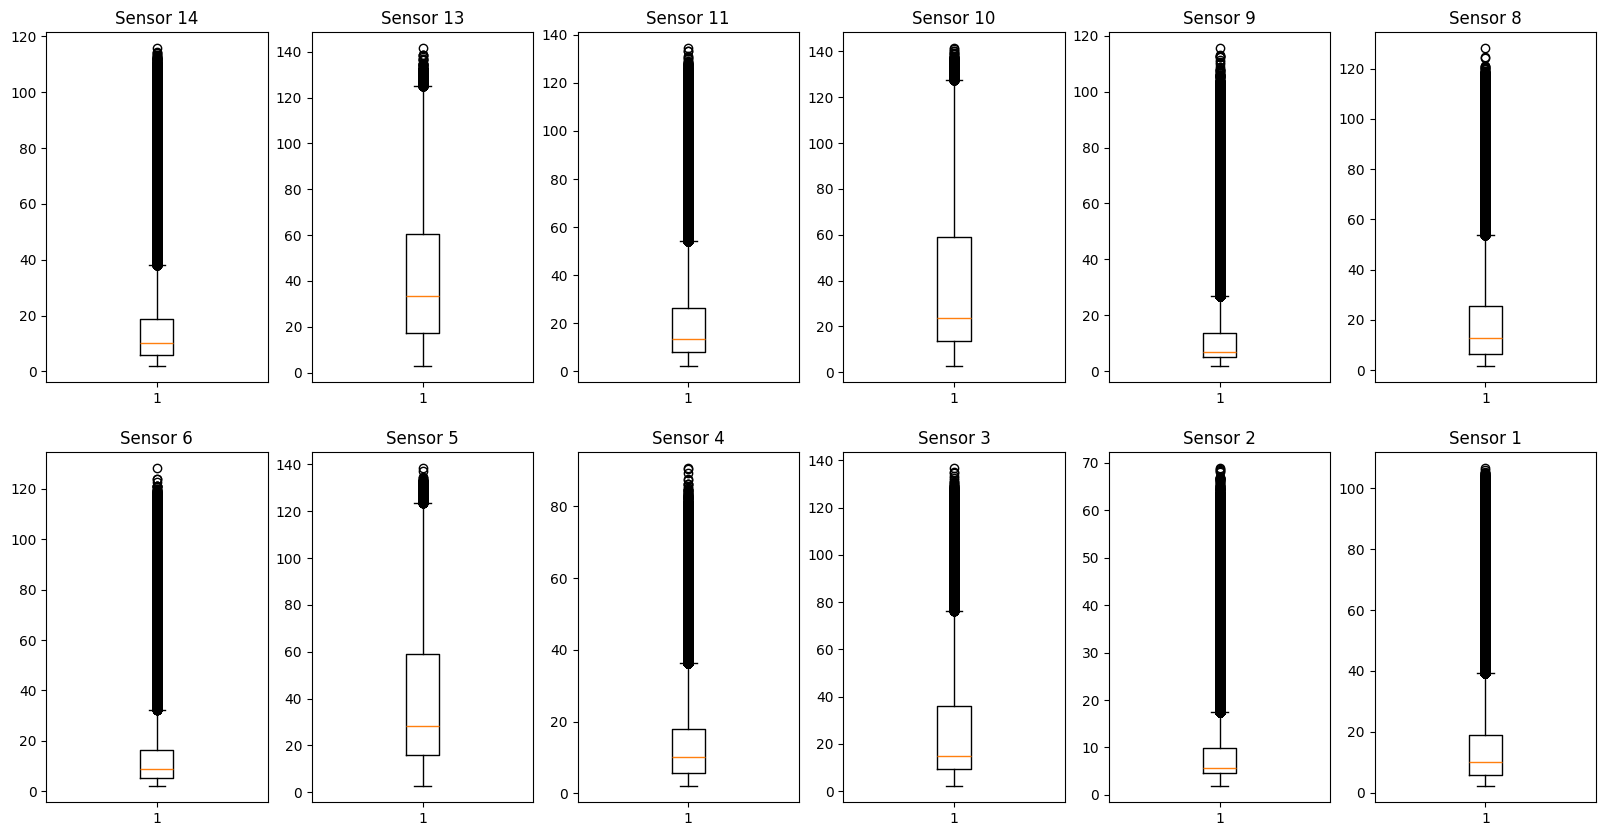

In [12]:
fig, ax = plt.subplots(2, 6, figsize=(20, 10))
idxs = acc_idxs.copy()
for i in range(2):
    for j in range(6):
        idx = idxs.pop()
        ax[i, j].boxplot(sensors_removed[f'pmax[{idx}]'])
        ax[i, j].set_title("Sensor " + str(idx))

# area outliers

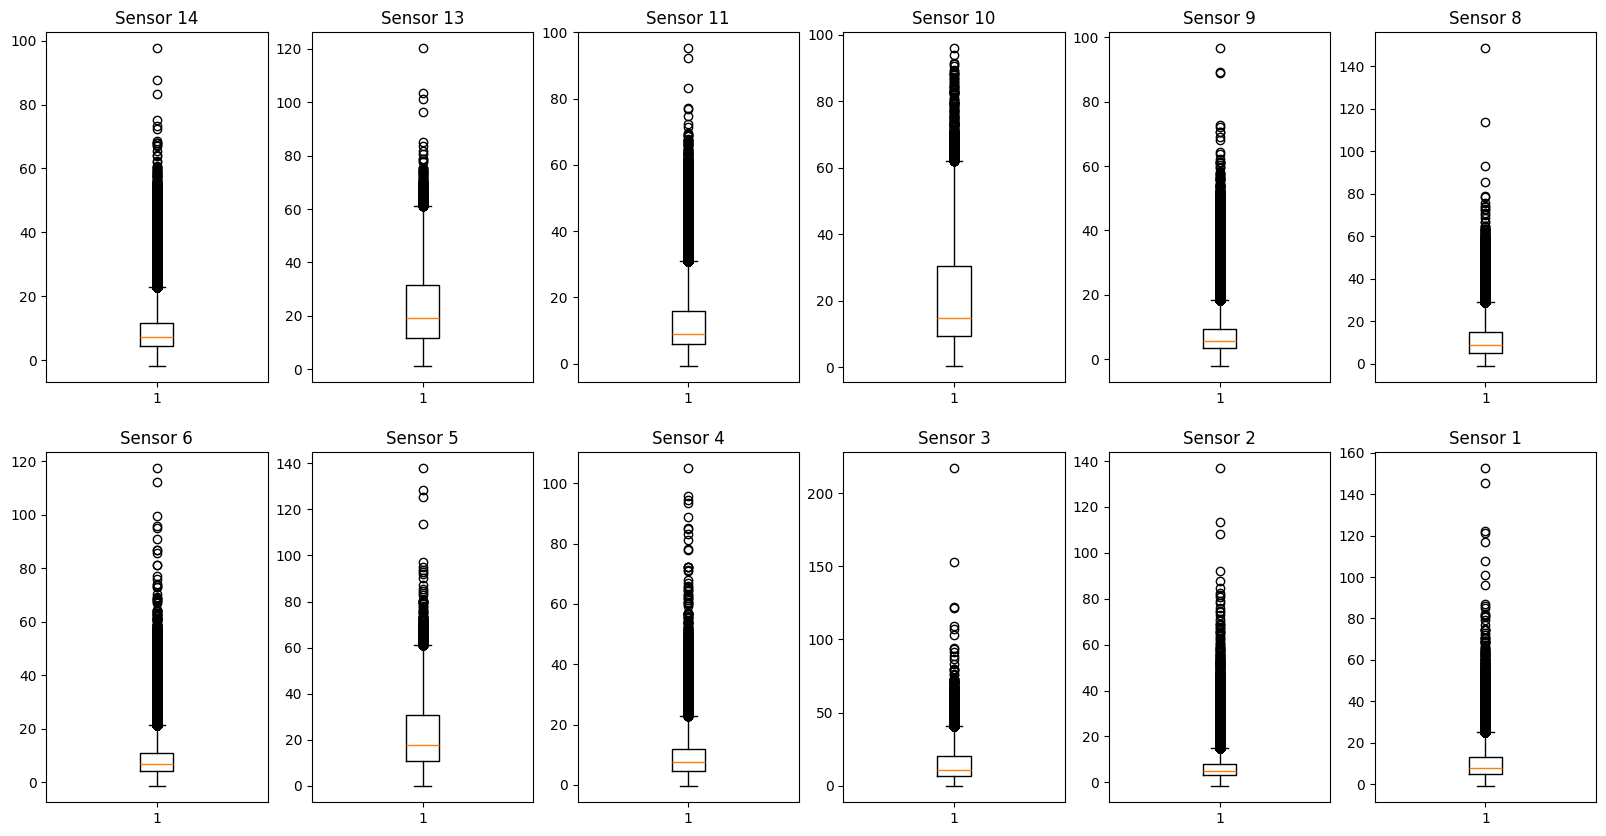

In [13]:
fig, ax = plt.subplots(2, 6, figsize=(20, 10))
idxs = acc_idxs.copy()
for i in range(2):
    for j in range(6):
        idx = idxs.pop()
        ax[i, j].boxplot(sensors_removed[f'area[{idx}]'])
        ax[i, j].set_title("Sensor " + str(idx))

# Correlations

In [85]:
joined_pmax = pd.concat([sensors_removed[clmn] for clmn in pmax_clms])
scatter = sb.scatterplot(x=joined_pmax, y=joined_negpmax)
scatter.set_ylabel('negpmax')
scatter.set_xlabel('pmax')
scatter.set_ylim(1, -80)

ValueError: cannot reindex on an axis with duplicate labels

We can see that some of these negpmax values are realistically far too low. We can remove the ones that are below -20000.

In [83]:
negpmax_trimmed = sensors_removed.drop(joined_negpmax[joined_negpmax < -100].index)
print("Removed rows: ", (sensors_removed.shape[0] - negpmax_trimmed.shape[0]))
joined_negpmax[ph.get_column_names(['negpmax'], acc_idxs)].plot(kind='hist', bins=10)
sensors_removed

Removed rows:  248


KeyError: "None of [Index(['negpmax[1]', 'negpmax[2]', 'negpmax[3]', 'negpmax[4]', 'negpmax[5]',\n       'negpmax[6]', 'negpmax[8]', 'negpmax[9]', 'negpmax[10]', 'negpmax[11]',\n       'negpmax[13]', 'negpmax[14]'],\n      dtype='object')] are in the [index]"

In [16]:
new_joined_negpmax = pd.concat([negpmax_trimmed[clmn] for clmn in negpmax_clms])
new_joined_pmax = pd.concat([negpmax_trimmed[clmn] for clmn in pmax_clms])

Text(0.5, 0, 'pmax')

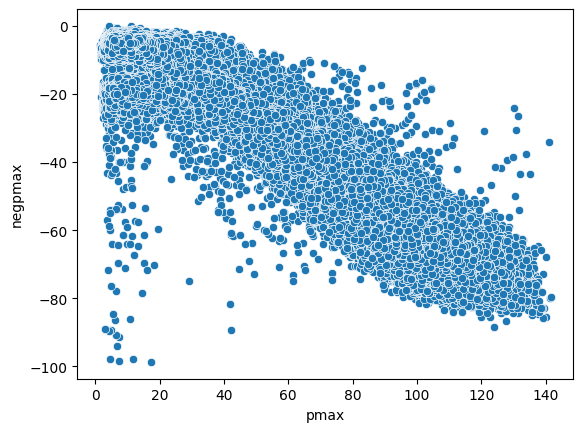

In [17]:
scatter = sb.scatterplot(x=new_joined_pmax, y=new_joined_negpmax)
scatter.set_ylabel('negpmax')
scatter.set_xlabel('pmax')

Now lets do an experiment by removing all the rows where the values of the negpmax are below -100

In [28]:
subset = sensors_removed.sample(20_000)

y = subset[['x', 'y']].copy()

X = subset.drop(columns=['x', 'y'])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, shuffle=True, random_state=42)

X_train_trimmed = X_train.drop(joined_negpmax[joined_negpmax < -90].index.join(X_train.index, how='inner'))
y_train_trimmed = y_train.drop(joined_negpmax[joined_negpmax < -90].index.join(y_train.index, how='inner'))

print(X_train.shape[0])
print(y_train.shape[0])
print()
print(X_train_trimmed.shape[0])
print(y_train_trimmed.shape[0])

15000
15000

14989
14989


In [33]:
reg = RandomForestRegressor(100, random_state=42, verbose=1)
reg.fit(X_train.sample(X_train_trimmed.shape[0]) , y_train.sample(y_train_trimmed.shape[0]))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  2.4min


RandomForestRegressor(random_state=42, verbose=1)

In [34]:
reg_trimmed = RandomForestRegressor(100, random_state=42, verbose=1)
reg_trimmed.fit(X_train_trimmed , y_train_trimmed)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.4min


RandomForestRegressor(random_state=42, verbose=1)

In [ ]:
med_without_trimming = ph.mean_euclid_dist(y_valid, reg.predict(X_valid))
med_with_trimming = ph.mean_euclid_dist(y_valid, reg_trimmed.predict(X_valid))
print(med_without_trimming)
print(med_with_trimming)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


5.45642195321413
5.457042350285077


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


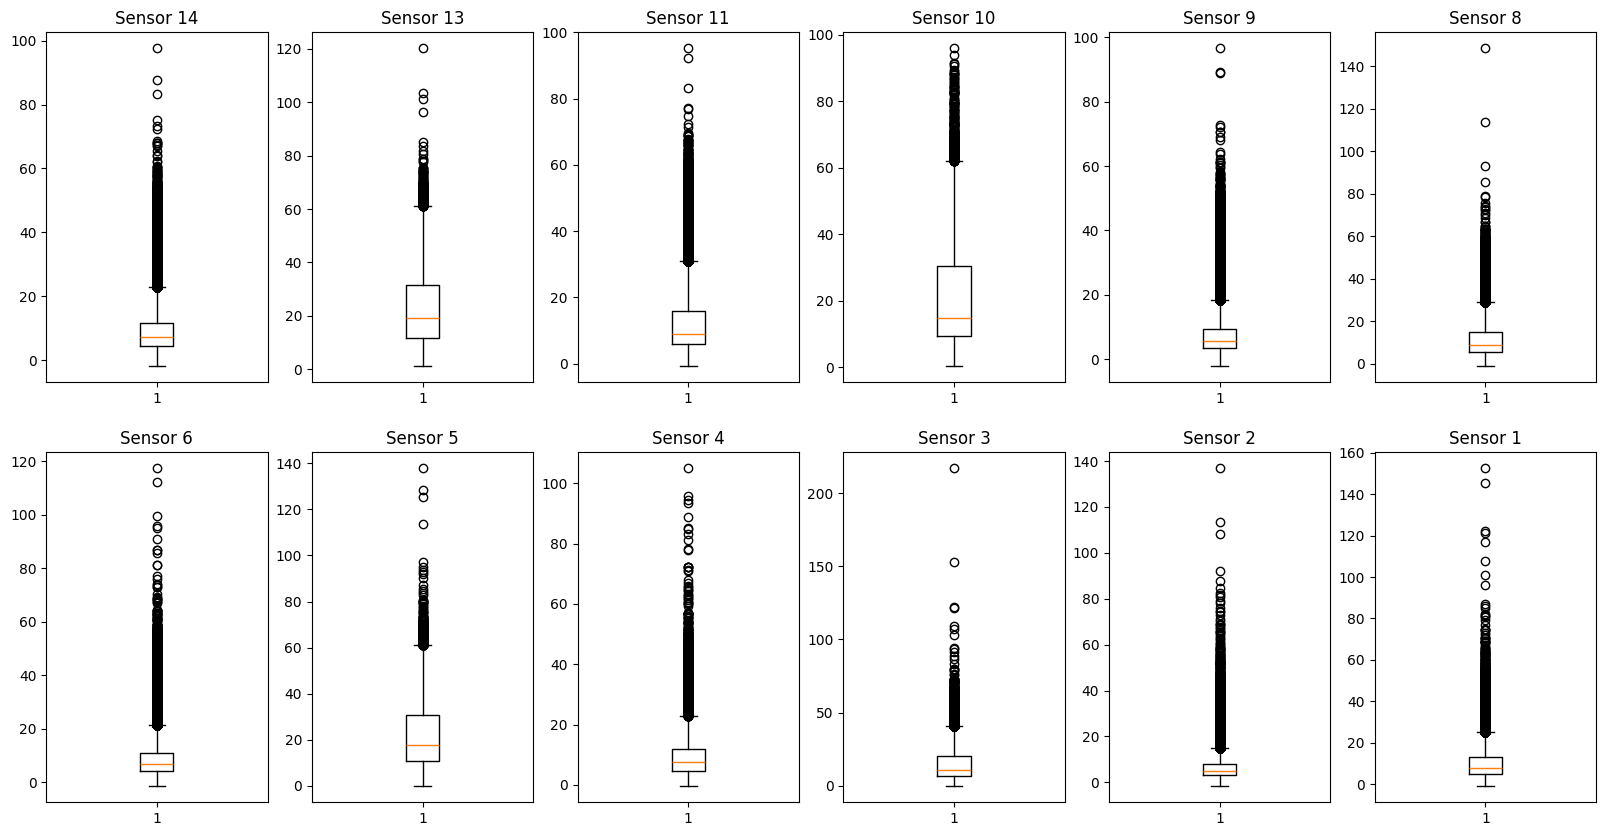

In [30]:
fig, ax = plt.subplots(2, 6, figsize=(20, 10))
idxs = acc_idxs.copy()
for i in range(2):
    for j in range(6):
        idx = idxs.pop()
        ax[i, j].boxplot(negpmax_trimmed[f'area[{idx}]'])
        ax[i, j].set_title("Sensor " + str(idx))

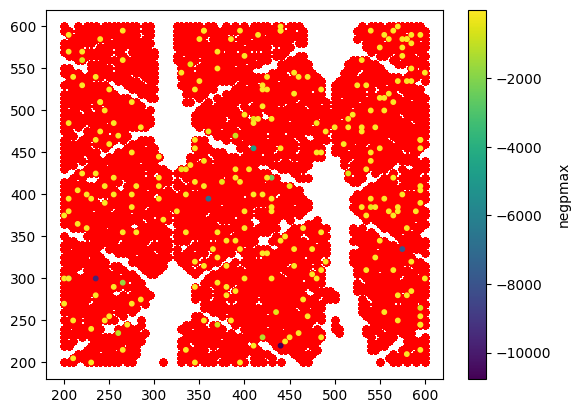

In [82]:
negpmax_outliers_index = joined_negpmax[joined_negpmax < -90].index
negpmax_outliers = sensors_removed.loc[negpmax_outliers_index]
plt.scatter(x=sensors_removed['x'], y=sensors_removed['y'], c='red', s=20)
plt.scatter(x=negpmax_outliers['x'], y=negpmax_outliers['y'], c=negpmax_outliers['negpmax[2]'], s=10)
cbar = plt.colorbar(label='negpmax')
plt.show()

As we can see, this change is negligible, and actually slightly worse.